In [1]:
print("on this file")

on this file


Run the next cell to load raw dataset

In [2]:
import pandas as pd

df = pd.read_csv("C:/Users/Emily Shao/Desktop/archive/itineraries.csv")
print("done")

done


In [3]:
df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,9ca0e81111c683bec1012473feefd28f,4/16/2022,4/17/2022,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,1650223560,2022-04-17T15:26:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,8940,947,coach
1,98685953630e772a098941b71906592b,4/16/2022,4/17/2022,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650200400,2022-04-17T09:00:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9000,947,coach
2,98d90cbc32bfbb05c2fc32897c7c1087,4/16/2022,4/17/2022,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650218700,2022-04-17T14:05:00.000-04:00,BOS,ATL,Delta,DL,Boeing 757-200,9000,947,coach
3,969a269d38eae583f455486fa90877b4,4/16/2022,4/17/2022,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,...,1650227460,2022-04-17T16:31:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9120,947,coach
4,980370cf27c89b40d2833a1d5afc9751,4/16/2022,4/17/2022,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,...,1650213180,2022-04-17T12:33:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9240,947,coach


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 27 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   legId                              1048575 non-null  object 
 1   searchDate                         1048575 non-null  object 
 2   flightDate                         1048575 non-null  object 
 3   startingAirport                    1048575 non-null  object 
 4   destinationAirport                 1048575 non-null  object 
 5   fareBasisCode                      1048575 non-null  object 
 6   travelDuration                     1048575 non-null  object 
 7   elapsedDays                        1048575 non-null  int64  
 8   isBasicEconomy                     1048575 non-null  bool   
 9   isRefundable                       1048575 non-null  bool   
 10  isNonStop                          1048575 non-null  bool   
 11  baseFare                

In [5]:
condensed_df = pd.DataFrame([df['flightDate'], df['baseFare'], df['startingAirport'], df['destinationAirport']])
condensed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1048565,1048566,1048567,1048568,1048569,1048570,1048571,1048572,1048573,1048574
flightDate,4/17/2022,4/17/2022,4/17/2022,4/17/2022,4/17/2022,4/17/2022,4/17/2022,4/17/2022,4/17/2022,4/17/2022,...,6/5/2022,6/5/2022,6/5/2022,6/5/2022,6/5/2022,6/5/2022,6/5/2022,6/5/2022,6/5/2022,6/5/2022
baseFare,217.67,217.67,217.67,217.67,217.67,217.67,213.02,213.02,213.02,213.02,...,440.93,440.93,495.81,533.95,556.28,595.35,595.35,705.11,770.22,78.14
startingAirport,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,ATL,...,IAD,IAD,IAD,IAD,IAD,IAD,IAD,IAD,IAD,IAD
destinationAirport,BOS,BOS,BOS,BOS,BOS,BOS,BOS,BOS,BOS,BOS,...,DFW,DFW,DFW,DFW,DFW,DFW,DFW,DFW,DFW,DTW


In [6]:
# condensed_
df['baseFare'][5]

217.67

Pretend that you have a DF with the columsn for flightDate, baseFare, startingAirport, destinationAirport

For now, I am using the variable df

In [7]:
avg_price_dict = {}
current_date = df['flightDate'][0]
current_total = 0
day_counter = 0

for i in range(len(df['flightDate'])):
    if df['flightDate'][i] != current_date:
        avg = current_total / day_counter
        avg_price_dict[current_date] = avg

        day_counter = 0
        current_total = 0

        current_date = df['flightDate'][i]
    
    day_counter += 1
    current_total += df['baseFare'][i]
    
print("finished")


finished


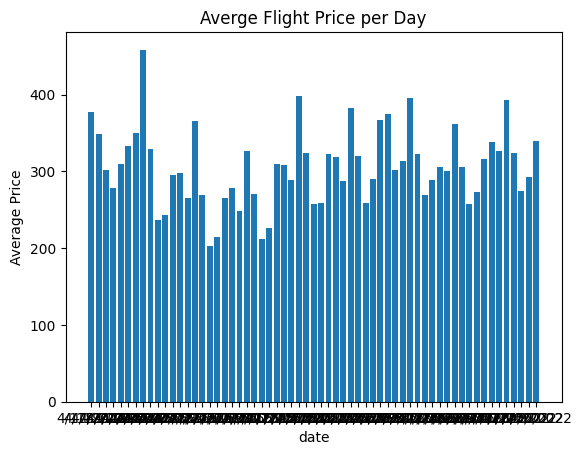

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

plt.bar(avg_price_dict.keys(), avg_price_dict.values())
plt.xlabel("date")
plt.ylabel("Average Price")
plt.title("Averge Flight Price per Day")
plt.show()

plt.savefig(fname="C:/Users/Emily Shao/Desktop/FlightPricePredictor/Graphs/FlightPricePerDay.png")

In [9]:
day_of_week_index = 0
day_of_week_prices = [0] * 7

for key in avg_price_dict.keys():
   day_of_week_prices[day_of_week_index] += avg_price_dict[key]

   day_of_week_index += 1 
   day_of_week_index %= 7

day_of_week_names = ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']

# correct for averages instead of sums, with 61 total dates
for i in range(5):
   day_of_week_prices[i] = day_of_week_prices[i] / 9

day_of_week_prices[5] = day_of_week_prices[5] / 8
day_of_week_prices[6] = day_of_week_prices[6] / 8


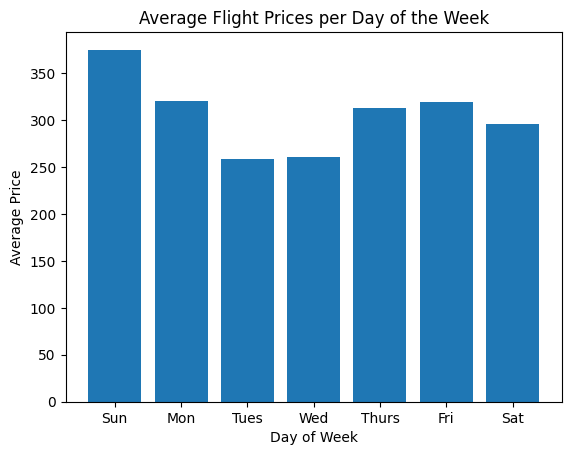

<Figure size 640x480 with 0 Axes>

In [50]:
plt.bar(day_of_week_names, day_of_week_prices)
plt.xlabel("Day of Week")
plt.ylabel("Average Price")
plt.title("Average Flight Prices per Day of the Week")
plt.show()

plt.savefig(fname="C:/Users/Emily Shao/Desktop/FlightPricePredictor/Graphs/FlightPricePerWeekday.png")

In [41]:
airport_value_count = df['startingAirport'].value_counts()
airport_value_count.keys()

Index(['LAX', 'LGA', 'BOS', 'DFW', 'SFO', 'ORD', 'ATL', 'MIA', 'CLT', 'PHL',
       'DTW', 'DEN', 'EWR', 'JFK', 'IAD', 'OAK'],
      dtype='object')

In [ ]:
airport_prices = {}


for i in range(len(df['startingAirport'])):
    airport = df['startingAirport'][i]
    price = df['baseFare'][i]

    if airport not in airport_prices.keys():
        airport_prices[airport] = 0

    airport_prices[airport] += price


for key in airport_prices:
    num_of_flights = airport_value_count[key]

    airport_prices[key] = airport_prices[key] / num_of_flights


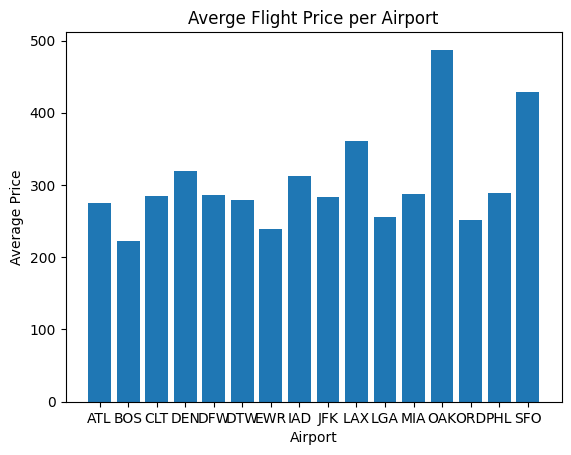

<Figure size 640x480 with 0 Axes>

In [51]:
plt.bar(airport_prices.keys(), airport_prices.values())
plt.xlabel("Airport")
plt.ylabel("Average Price")
plt.title("Averge Flight Price per Starting Airport")
plt.show()

plt.savefig(fname="C:/Users/Emily Shao/Desktop/FlightPricePredictor/Graphs/FlightPricePerAirport.png")

Tried anova below

In [ ]:
from scipy.stats import f_oneway
import pandas as pd

# Sample data (replace this with your actual data)
data = {
    'Airport': ['JFK', 'LAX', 'ORD', 'DFW', 'ATL'],
    'Starting_Price': [200, 220, 180, 210, 190]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Group prices by airport
grouped_data = [df[df['Airport'] == airport]['Starting_Price'] for airport in df['Airport'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Print results
print("One-way ANOVA Results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than", alpha, "so we reject the null hypothesis.")
    print("There is a significant difference in starting prices across different airports.")
else:
    print("The p-value is greater than or equal to", alpha, "so we fail to reject the null hypothesis.")
    print("There is no significant difference in starting prices across different airports.")
